In [21]:
import numpy as np
import matplotlib.pyplot as plt

nx, ny = 251, 81
a, b = 100, 40
dz = 0.01
A = 1.0
IK, JK = 5, 10
y1, y2 = -40 * dz, 40 * dz
eps = 1e-7
I_MIN_OBS, I_MAX_OBS, J_MAX_OBS = -IK + a, IK + a, JK + b


 Zbieżność w iteracji 11500.


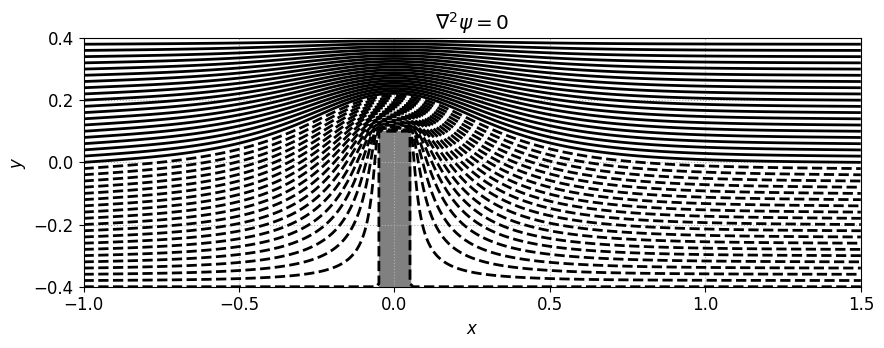

In [ ]:
psi = np.zeros((nx, ny))
y_vals = (np.arange(ny) - b) * dz
psi[0, :], psi[nx-1, :] = A * y_vals, A * y_vals
psi[:, ny-1], psi[:, 0] = A * y2, A * y1
psi[I_MIN_OBS:I_MAX_OBS+1, :J_MAX_OBS+1] = A * y1

is_fluid = np.full((nx, ny), True, dtype=bool)
is_fluid[I_MIN_OBS:I_MAX_OBS+1, :J_MAX_OBS+1] = False
is_fluid_interior = is_fluid[1:-1, 1:-1]

max_iter = 100000
for iteration in range(max_iter):
    psi_prev = psi.copy()
    update = 0.25 * (psi[2:, 1:-1] + psi[:-2, 1:-1] + psi[1:-1, 2:] + psi[1:-1, :-2])
    
    # Zastosowanie maski
    psi[1:-1, 1:-1][is_fluid_interior] = update[is_fluid_interior]

    if iteration % 500 == 0:
        delta = np.max(np.abs(psi - psi_prev))
        if delta < eps:
            print(f"\n Zbieżność w iteracji {iteration}.")
            break
else:
    print(f"\n Max iter.")

plt.rcParams.update({
    'lines.linewidth': 2,
    'font.size': 12,
    'legend.framealpha': 0.9,
    'legend.facecolor': '#f0f0f0',
    'legend.edgecolor': 'gray'
})
plt.figure(figsize=(9, 7))
x_coords = (np.arange(nx) - a) * dz
y_coords = (np.arange(ny) - b) * dz

plt.contour(x_coords, y_coords, psi.T, levels=40, colors='k', linewidths=2)
plt.fill_between(x_coords[I_MIN_OBS:I_MAX_OBS+1], y1, y_coords[J_MAX_OBS], color='gray')

plt.title('$\\nabla^2\\psi = 0$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, linestyle=':', linewidth=0.8)
plt.tight_layout()
plt.show()